# Laboratório 6
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: O Perceptron
No Laboratório de hoje, começaremos a entrar na área mais conhecida dentro do Aprendizado de Máquina: as Redes Neurais Artificiais! Mas, antes de vermos como uma Rede Neural funciona, vamos entender do que é formada essa rede, ou seja, neurônios artificiais.

Um neurônio artificial, também denominado Perceptron, é a unidade básica das redes neurais articiais, e tem seu funcionamneto inspirado pelos neurônios em nosso cérebro. Em suma, o Perceptron multiplica cada valor de um vetor de entrada por um respectivo `peso`, somando todos junto a um `viés` (*bias*). Esse valor então é passado por uma `função de ativação` que formata a saída para 0 ou 1, no algoritmo tradicional de classificação binária. Dessa forma, ele pode ser utilizado para fazer separações lineares nos dados, sendo treinado através do ajuste dos pesos e viéses.

Veremos um exemplo de uso de Perceptron para a classificação na base de dados Iris, mas excluindo uma das classes para tornar em um problema binário.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Carregando o dataset Iris
iris = load_iris()

# Removendo uma das classes para simplificar o problema
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]
y = (y == 1).astype(int)  # Convertendo para um problema binário

# Dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo
model = Perceptron(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 1.0


Como a separação entre as duas classes (setosa e virginica) é linear, o Perceptron conseguiu separá-las. Podemos ver também como foi feita essa separação, extraindo a equação da reta encontrada e exibindo um gráfico com as técnicas já aprendidas.

In [18]:
# imprimir função de decisão com os parâmetros do modelo
coef = model.coef_.ravel()
intercept = model.intercept_[0]

terms = [f"{coef[i]:+.1f} * {iris['feature_names'][i]}" for i in range(len(coef))]
equation = " ".join(terms) + f" {intercept:+.1f}"
print("Função de decisão (score bruto):")
print("f(x) =", equation)

Função de decisão (score bruto):
f(x) = -1.3 * sepal length (cm) -5.5 * sepal width (cm) +8.8 * petal length (cm) +4.1 * petal width (cm) -1.0


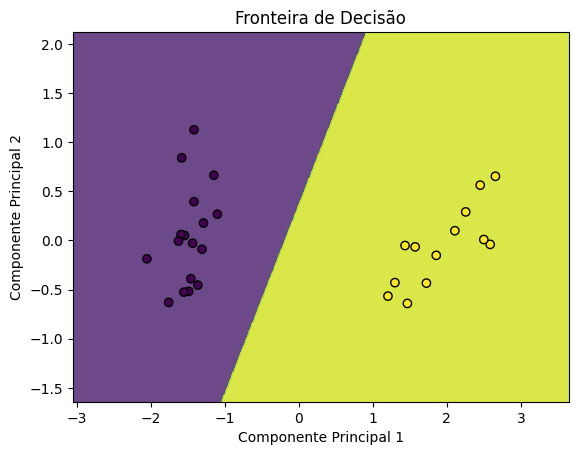

In [11]:
# Visualizando a fronteira de decisão
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, edgecolors='k', marker='o')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title("Fronteira de Decisão")
plt.show()

Dessa forma, conseguimos obter a equação utilissificou para 0 os elementos cujo f(x) foi negativo, e para 1, os positivos, separando linearmente o problema.